# Creando el modelo

In [ ]:
# Clonar el repositorio de YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Instalar las dependencias
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.66 MiB | 18.35 MiB/s, done.
Resolving deltas: 100% (11700/11700), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 33.8 MB/s eta 0:00:00


In [ ]:
!python train.py --img 640 --batch 16 --epochs 100 --data /content/dataset.yaml --weights yolov5s.pt --name yolo_artwork_detection

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-12 00:11:01.340558: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-12 00:11:01.359593: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-12 00:11:01.366633: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to regi

Reconocer en ejemplos

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/yolo_artwork_detection/weights/best.pt --img 640 --source /content/dataset/images/val

detect: weights=['/content/yolov5/runs/train/yolo_artwork_detection/weights/best.pt'], source=/content/dataset/images/val, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/20 /content/dataset/images/val/cuadro-decoracion-hogar_71f137e0f9_jpg.rf.ed5b701e70f00356b9eb415108dad908.jpg: 640x640 (no detections), 11.5ms
image 2/20 /content/dataset/images/val/cuadro-decoracion-hogar_80372fd22c_jpg.rf.ea947ff31a6998f81dd1afa7b06f660e.jpg: 6

## Usar el Modelo para Detección en Nuevas Imágenes

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-11-12 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/

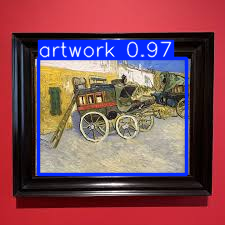

In [ ]:
import torch
from PIL import Image

# Cargar el modelo YOLOv5 entrenado
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/yolo_artwork_detection/weights/best.pt')

# Ruta de una imagen de prueba
#image_path = '/content/dataset/images/val/ejemplo.jpg'  # Cambia a la ruta de imagen de prueba
image_path = '/content/images.jpeg'

# Realizar la detección
results = model(image_path)

# Mostrar los resultados
results.show()  # Esto abrirá la imagen con los cuadros delimitadores

In [ ]:
# Obtener las coordenadas del cuadro delimitador
detections = results.xyxy[0].cpu().numpy()  # Convierte los resultados a un array de NumPy

# Iterar sobre los cuadros delimitadores detectados (si hay varios objetos)
for detection in detections:
    x_min, y_min, x_max, y_max, confidence, class_id = detection
    print(f"Cuadro delimitador: ({x_min}, {y_min}), ({x_max}, {y_max}) con confianza {confidence}")

    # Cargar la imagen original
    image = Image.open(image_path)

    # Recortar usando las coordenadas del cuadro delimitador
    roi = image.crop((x_min, y_min, x_max, y_max))
    roi.show()  # Muestra la región de interés recortada (no funciona el colab)

Cuadro delimitador: (38.13414764404297, 58.432106018066406), (186.4048309326172, 174.7606658935547) con confianza 0.9672314524650574


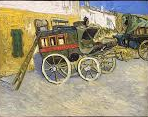

In [ ]:
from IPython.display import display

# Mostrar la región de interés recortada en colab
display(roi)

## Convirtiendo

In [ ]:
!pip install -r requirements.txt coremltools onnx onnx-simplifier onnxruntime-gpu openvino-dev tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2


In [ ]:
!python export.py --weights /content/yolov5/runs/train/yolo_artwork_detection/weights/best.pt --include tflite

export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/yolo_artwork_detection/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/yolo_artwork_detection/weights/best.pt with output shape (1, 25200, 6) (13.8 MB)
2024-11-12 00:40:01.704587: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-12 00:40:01.720652: E external/local_xla/xla